In [3]:
import re  
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [4]:


def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

# Load and preprocess financial text data
def load_data(data, Sentence, Sentiment):
    data = pd.read_csv('data.csv')
    texts = data['Sentence']
    labels = data['Sentiment']
    
    for i in range(len(texts)):
        texts.iloc[i] = preprocess_text(texts.iloc[i])

    encoder = OneHotEncoder()
    labels = encoder.fit_transform(labels.values.reshape(-1, 1)).toarray() 

    vocab_size = 10000  
    max_len = 100  
    tokenizer = text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    train_padded_sequences, test_padded_sequences, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2)

    return train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer

def create_model(vocab_size, embedding_dim, lstm_units, num_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(LSTM(lstm_units))  
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_model(model, train_padded_sequences, train_labels, epochs=10):
    model.fit(train_padded_sequences, train_labels, epochs=epochs, validation_split=0.2)

def evaluate_model(model, test_padded_sequences, test_labels):
    loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
    print(f'Loss: {loss}, Accuracy: {accuracy:.4f}')
    
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}')
  
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}')
  
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision, recall, and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  recall = recall_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f},\n Precision: {precision:.4f},\n Recall: {recall:.4f},\n F1 Score: {f1:.4f}')

def predict_sentiment(model, tokenizer, text):
    text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    prediction = model.predict(padded_sequence)[0]
    predicted_class = np.argmax(prediction)

    sentiment_labels = ['Positive', 'Neutral', 'Negative']  
    sentiment = sentiment_labels[predicted_class]

    return sentiment

vocab_size = 10000  
embedding_dim = 128  
lstm_units = 64  
num_classes = 3  
max_len = 100 
data_path = "data.csv"  

train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer = load_data(data_path, "Sentence", "Sentiment") 

model = create_model(vocab_size, embedding_dim, lstm_units, num_classes)

train_model(model, train_padded_sequences, train_labels, epochs=10)

evaluate_model(model, test_padded_sequences, test_labels)

new_text = "The stock market is booming!"
predicted_sentiment = predict_sentiment(model, tokenizer, new_text)
print(f"Predicted sentiment for '{new_text}': {predicted_sentiment}")


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - accuracy: 0.5376 - loss: 0.9892 - val_accuracy: 0.6310 - val_loss: 0.8428
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.7116 - loss: 0.6677 - val_accuracy: 0.7016 - val_loss: 0.7383
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8669 - loss: 0.3110 - val_accuracy: 0.6759 - val_loss: 0.8385
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9127 - loss: 0.1945 - val_accuracy: 0.6802 - val_loss: 0.9225
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9164 - loss: 0.1492 - val_accuracy: 0.6695 - val_loss: 1.0266
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9291 - loss: 0.1309 - val_accuracy: 0.6791 - val_loss: 1.2095
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9342 - loss: 0.1191 - val_accuracy: 0.6727 - val_loss: 1.2634
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9355 - loss: 0.1078 - 

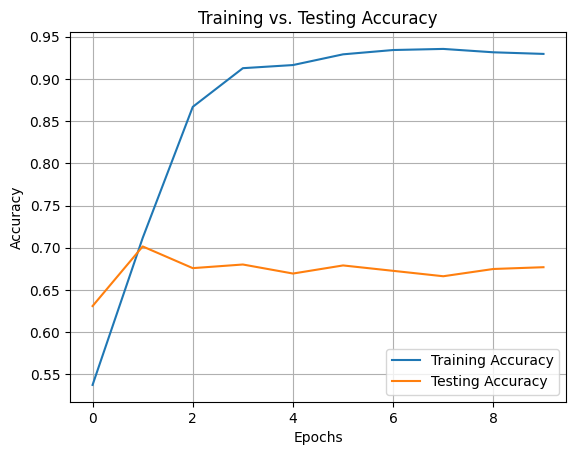

In [5]:
import matplotlib.pyplot as plt

# Replace with your actual training and testing accuracy values
train_acc = [0.5376, 0.7116, 0.8669, 0.9127, 0.9164, 0.9291, 0.9342, 0.9355, 0.9315, 0.9296]
test_acc = [0.6310, 0.7016, 0.6759, 0.6802, 0.6695, 0.6791, 0.6727, 0.6663, 0.6749, 0.6770]
epochs = range(len(train_acc))  # Epochs for the x-axis

# Plot training and testing accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()